In [ ]:
%matplotlib inline
import scipy.io.wavfile as wv_file
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.signal import butter, lfilter
from scipy.fftpack import fft
import random

plt.rcParams["figure.figsize"] = (30,20)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

푸리에 변환(Fourier transform)이라는 함수를 사용하면 특정 시간 길이의 음성 조각(이를 프레임이라고 부름)이 각각의 주파수 성분들을 얼마만큼 갖고 있는지를 의미하는 스펙트럼(spectrum)을 얻을 수 있습니다. 


이렇게 음성 전체로부터 얻은 여러 개의 스펙트럼을 시간 축에 나열하면 시간 변화에 따른 스펙트럼의 변화인 스펙트로그램(spectrogram)을 얻게 됩니다. 


사람의 귀 또한 이와 유사한 메커니즘을 갖고 있어 소리에 들어 있는 각각의 주파수 성분들을 추출하는 방식으로 청취한 소리에 내재된 정보들을 얻는 것입니다.

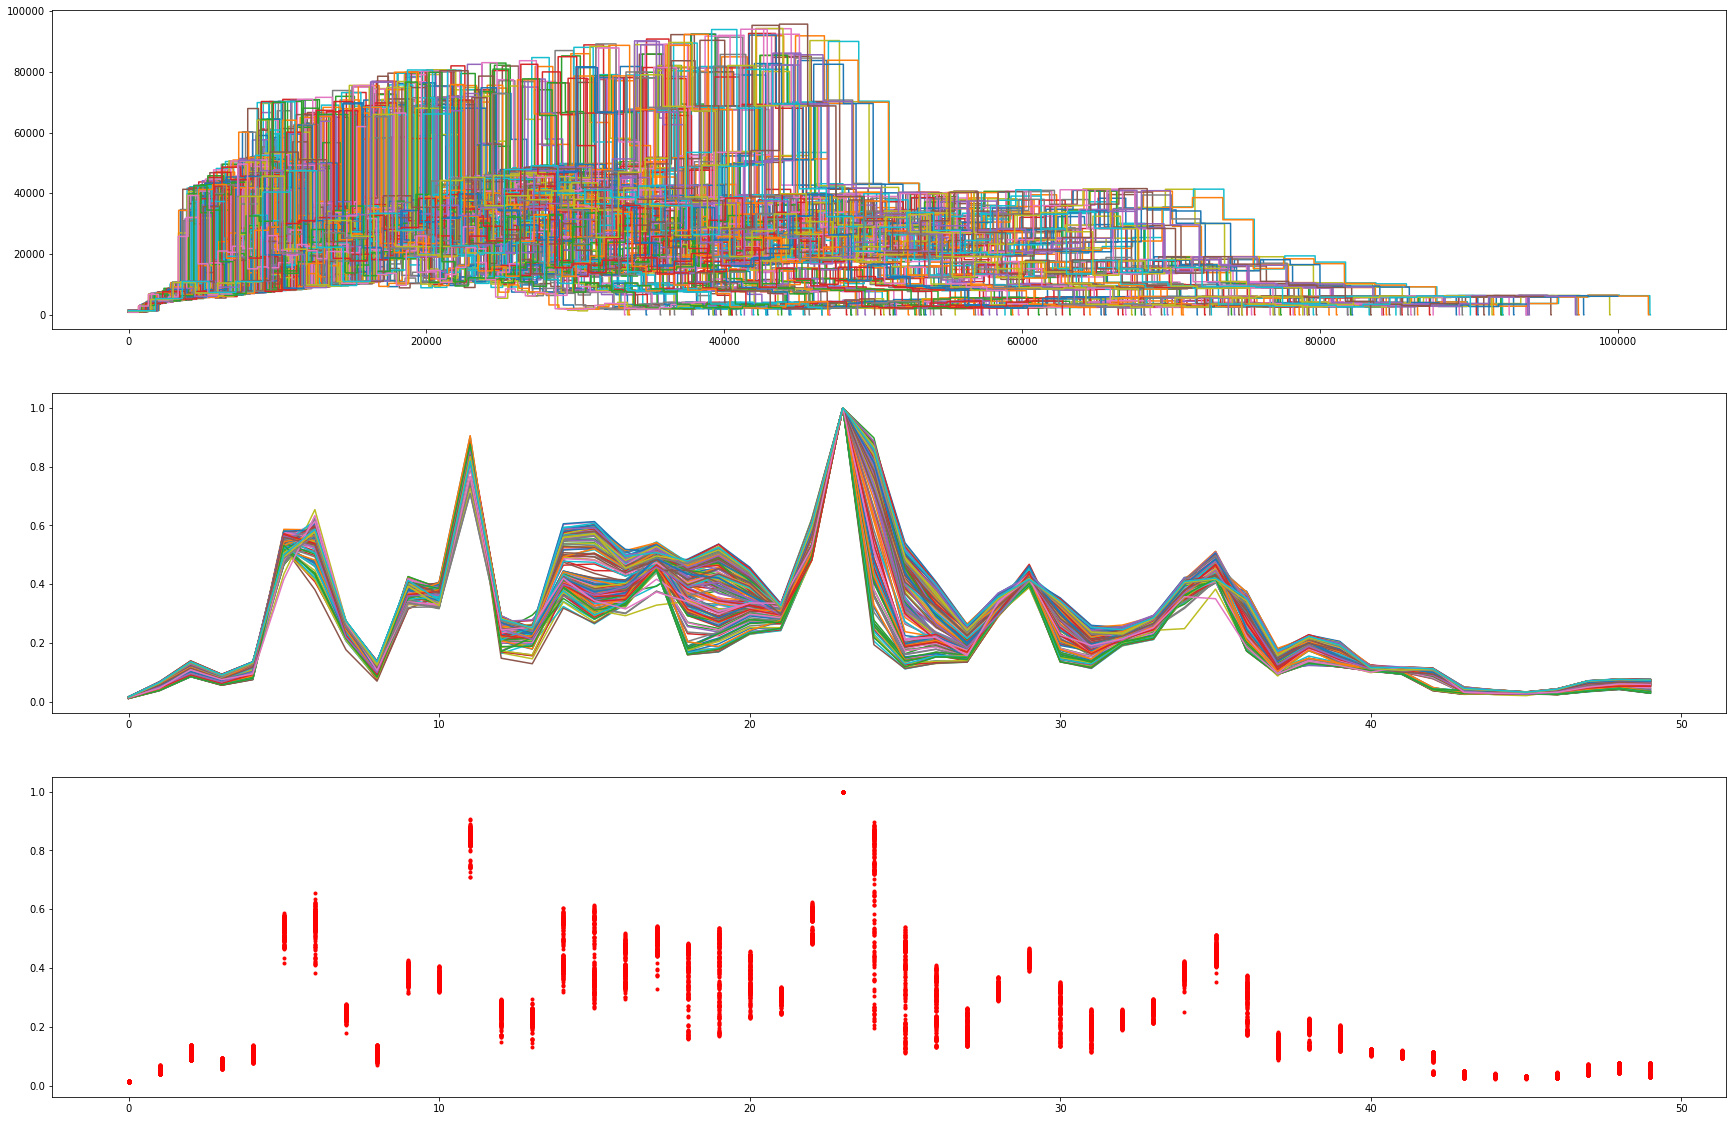

In [2]:
#소아 발작 소리

fs,samples_filt = wv_file.read('spasmatic_kid.wav')
features_spasm = []
samples_fil = butter_bandpass_filter(samples_filt, 6, 12000, fs, order=3)
for indx in range(0,200):
    a = random.randint(0,100)*1000
    b = random.randint(400,1000)*1000
    offset = random.randint(0,20)*10000
    sub_sample_f = samples_filt[a+offset:b+offset]
    N = len(sub_sample_f)
    T = 1/fs
    yf = fft(sub_sample_f)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #print(a)
    #print(b)
    for i in range(0,len(xf)):
        if xf[i] > 5000:
            break
    flen = i
    freq = 2.0/N * np.abs(yf[0:N//2])
    freqs = freq[0:flen]
    bunum = 50
    wlen = int(flen/bunum)
    bucket = [0]*len(freqs)
    st = 0
    feature_vector = []
    for i in range(0,bunum):
        binval = 0
        for m in range(st,st+wlen):
            binval = binval+freqs[m]
        feature_vector.append(binval)
        for m in range(st,st+wlen):
            bucket[m] = binval
        st = m+1
    feature_vector = feature_vector/max(feature_vector)
    plt.subplot(311)
    plt.plot(bucket)
    plt.subplot(312)
    plt.plot(feature_vector)
    plt.subplot(313)
    plt.plot(feature_vector, '.r')
    #feature_vector.append(0)
    features_spasm.append(np.append(feature_vector,int(1)))

In [4]:
features_spasm

[array([0.0171949 , 0.0666995 , 0.13282595, 0.08983596, 0.13310531,
        0.50787225, 0.57532583, 0.26956143, 0.13310165, 0.40208143,
        0.33603692, 0.82630931, 0.27135567, 0.24411663, 0.58096139,
        0.58905633, 0.50676285, 0.53722754, 0.46743244, 0.51049251,
        0.43707491, 0.31814392, 0.61309228, 1.        , 0.83042525,
        0.51294059, 0.39155636, 0.2557465 , 0.36468434, 0.42229866,
        0.33405409, 0.25079935, 0.24343681, 0.2856647 , 0.42020948,
        0.41232588, 0.35993714, 0.17493769, 0.21703787, 0.19714698,
        0.1163141 , 0.11370403, 0.10952413, 0.04861359, 0.03915074,
        0.03280469, 0.04267894, 0.06981833, 0.07544642, 0.07305013,
        1.        ]),
 array([0.01561079, 0.06301841, 0.12747182, 0.0870443 , 0.1281703 ,
        0.53838521, 0.55988899, 0.25573897, 0.12215074, 0.37703067,
        0.34340845, 0.82676622, 0.26460877, 0.2381106 , 0.5502224 ,
        0.55093213, 0.47620502, 0.52190139, 0.44781722, 0.48650051,
        0.42480643, 0.3132

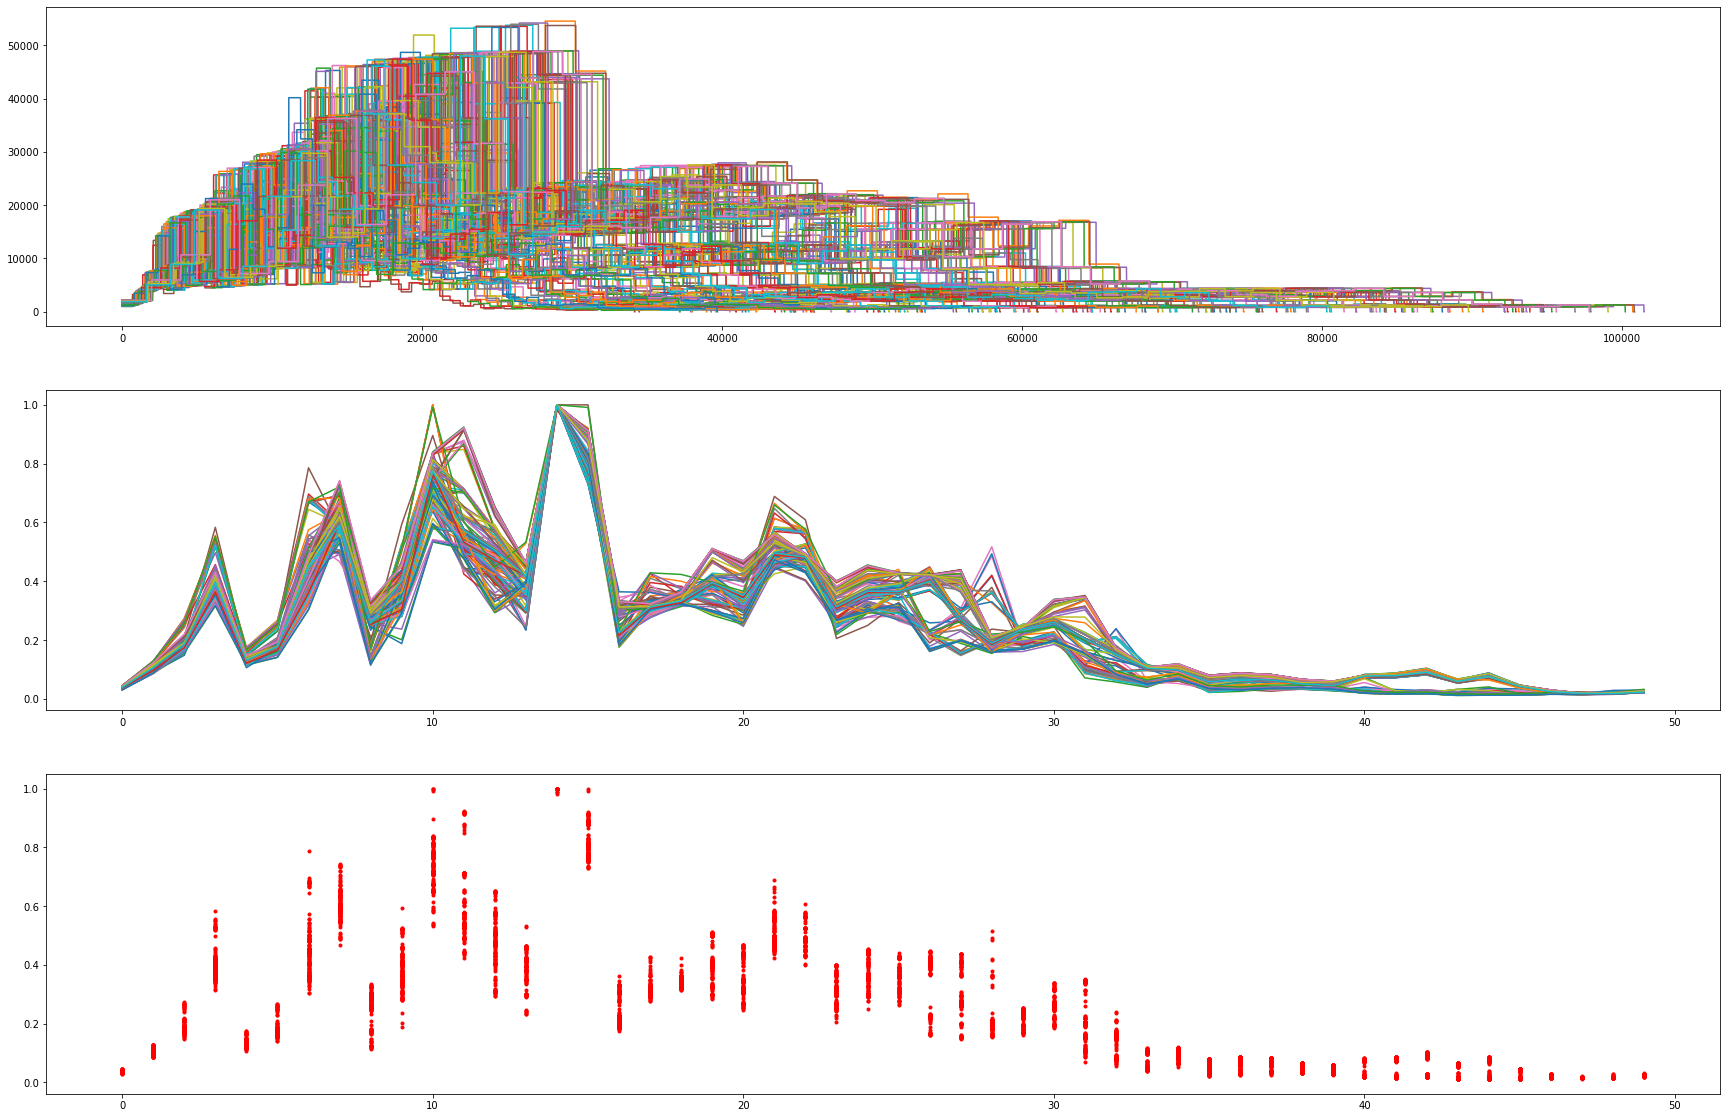

In [6]:
#아이가 배고파서 우는 소리

fs,samples_filt = wv_file.read('hunger.wav')
features_hungry = []
samples_fil = butter_bandpass_filter(samples_filt, 6, 12000, fs, order=3)
for indx in range(0,200):
    a = random.randint(0,100)*1000
    b = random.randint(400,1000)*1000
    offset = random.randint(0,20)*10000
    sub_sample_f = samples_filt[a+offset:b+offset]
    N = len(sub_sample_f)
    T = 1/fs
    yf = fft(sub_sample_f)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #print(a)
    #print(b)
    for i in range(0,len(xf)):
        if xf[i] > 5000:
            break
    flen = i
    freq = 2.0/N * np.abs(yf[0:N//2])
    freqs = freq[0:flen]
    bunum = 50
    wlen = int(flen/bunum)
    bucket = [0]*len(freqs)
    st = 0
    feature_vector = []
    for i in range(0,bunum):
        binval = 0
        for m in range(st,st+wlen):
            binval = binval+freqs[m]
        feature_vector.append(binval)
        for m in range(st,st+wlen):
            bucket[m] = binval
        st = m+1
    feature_vector = feature_vector/max(feature_vector)                                     
    
    plt.subplot(311)
    plt.plot(bucket)
    plt.subplot(312)
    plt.plot(feature_vector)
    plt.subplot(313)
    plt.plot(feature_vector, '.r')
    #feature_vector.append(1)
    features_hungry.append(np.append(feature_vector,int(0)))

In [7]:
op_hungry = [0]*len(features_hungry)
op_spasm = [1]*len(features_spasm)

In [8]:
a={}
a['hungry']=features_hungry

In [9]:
b={}
b['spasm']=features_spasm

In [10]:
import scipy.io as io

io.savemat('hungry_ANN.mat',a)
io.savemat('spasm_ANN.mat',b)
#특징추출해서 저장

waveform을 푸리에 변환을 통해 각 주파수들로 분해, 푸리에 변환을 통해 time domain에서 frequency domain 그래프로 바꾸고 이러한 그래프를 스펙트럼이라고 정의
    
time->frequency, amplitude->magnitude

오디오 데이터를 전처리하여 특징을 각각 mat 파일로 저장